### Basic CNN Architecture (3 Conv / Flatten - Dense - Dropout - Dense) 예제

1. 입력층 개념은 없애고, Conv2D(input_shape=(28,28,1), ...) 형태여야 한다

2. model.fit(), model.evaluate(), model.predict() 실행시킬때 입력데이터의 형변환을 reshape(-1, 28, 28, 1) 같이 tensor 로 해주어야 한다

3. 1st conv => 3 x 3 크기의 32 개 필터, No padding, 2 x 2 max pooling, 1stride

4. 2nd conv => 3 x 3 크기의 64 개 필터, padding 있음, 2 x 2 max pooling, 1stride, No Pooling Padding

5. 3rd conv => 3 x 3 크기의 128 개 필터, padding 있음, 2 x 2 max pooling, 1stride

6. Flatten - Dense(512,) - Dropout - Dense(10,)

7. index_label_prediction

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


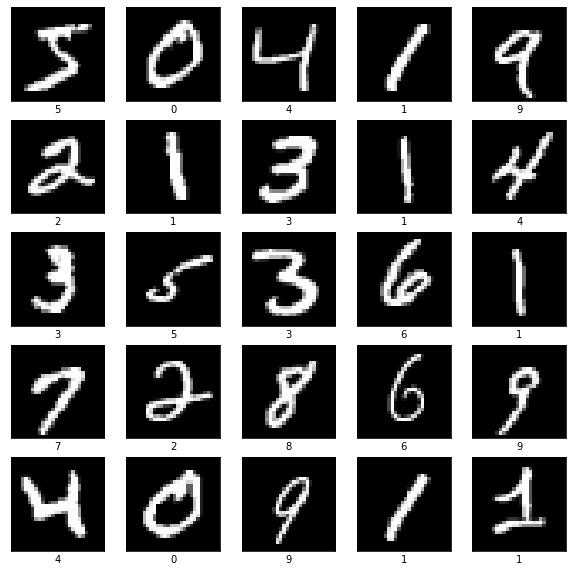

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
# hyper paramter

learning_rate = 0.001
epochs = 50
batch_size = 50

In [5]:
# sequential model construction

model = Sequential()

# input_layer = Flatten(input_shape=(28, 28, 1), name='input_layer')  # 이렇게 해면 error 발생
# model.add(input_layer)    # conv 레이어에서는 입력층을 Flatten 하면 error 발생

# 1st conv => 3 x 3 x 32 필터
model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='VALID'))

# 1st pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

# 2nd conv => 3 x 3 x 64 필터
model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 2nd pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='VALID'))

# 3rd conv => 3 x 3 x 128 필터
model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

# 3rd pooling
pooling_3 = MaxPooling2D(pool_size=(2,2), padding='SAME')
model.add(pooling_3)

# Flatten layer
model.add(Flatten())

# Dense 추가
model.add(Dense(64, activation='relu'))

# Dropout
model.add(Dropout(0.2))

# Dense 추가
model.add(Dense(64, activation='relu'))

# Dropout
model.add(Dropout(0.1))

# 출력층 
model.add(Dense(10, activation='softmax'))

In [6]:
# model compile

model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [8]:
# model shape 확인

print(model.input_shape, model.output_shape)

(None, 28, 28, 1) (None, 10)


In [9]:
# 원래 x_train, x_test 의 shape(차원) 은 (이미지 수, 28, 28) 의 3차원 데이터.
# 이것을 4차원으로 바꾸기 위해 reshape() 을 사용함.
# 가장 처음의 -1 은 batch_size 에 지정된 데이터가 한번에 오는것임.

start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 3s 4ms/step - loss: 0.2894 - accuracy: 0.9074 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 2/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0895 - accuracy: 0.9750 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 3/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0600 - accuracy: 0.9826 - val_loss: 0.0439 - val_accuracy: 0.9886
Epoch 4/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0371 - val_accuracy: 0.9894
Epoch 5/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 6/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0315 - accuracy: 0.9911 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 7/50
960/960 [==============================] - 3s 3ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 

In [10]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9935


[0.03731835260987282, 0.9934999942779541]

In [11]:
# index_label_prediction 코드 구현

ret_val = model.predict(x_test.reshape(-1,28,28,1))

print('type(ret_val) = ', type(ret_val), ', ret_val.shape = ', ret_val.shape)

# predict 실행 결과는 softmax 에 의한 확률 결과이므로, argmax 이용해서 10진수로 바꾸어 주어야함

predicted_val = np.argmax(ret_val, axis=1)  # 행 단위로 argmax 실행

prediction_label_comp_val = np.equal(predicted_val, t_test)

# list comprehension 이용하여 index_label_prediction 구현

index_label_prediction_list = [ [index, t_test[index], predicted_val[index] ]  for index, result in enumerate(prediction_label_comp_val)  if result == False ]

print(len(index_label_prediction_list))

print('Accuracy = ', 1 - ( len(index_label_prediction_list) / len(t_test) ))

type(ret_val) =  <class 'numpy.ndarray'> , ret_val.shape =  (10000, 10)
65
Accuracy =  0.9935


In [12]:
print(index_label_prediction_list)

[[247, 4, 6], [449, 3, 5], [582, 8, 2], [625, 6, 4], [659, 2, 1], [674, 5, 3], [740, 4, 9], [938, 3, 8], [947, 8, 9], [1112, 4, 6], [1232, 9, 4], [1260, 7, 1], [1274, 4, 6], [1299, 5, 7], [1393, 5, 3], [1530, 8, 7], [1621, 0, 6], [1681, 3, 7], [1901, 9, 4], [2130, 4, 9], [2135, 6, 1], [2185, 0, 8], [2369, 5, 7], [2414, 9, 4], [2597, 5, 3], [2654, 6, 1], [2927, 3, 2], [2953, 3, 5], [3005, 9, 8], [3225, 7, 9], [3369, 9, 8], [3422, 6, 0], [3520, 6, 4], [3534, 4, 8], [3730, 7, 9], [3762, 6, 8], [3767, 7, 2], [3808, 7, 2], [3906, 1, 3], [4176, 2, 7], [4477, 0, 6], [4500, 9, 1], [4504, 2, 7], [4740, 3, 5], [4761, 9, 4], [4823, 9, 4], [4860, 4, 9], [5698, 4, 7], [5937, 5, 3], [5955, 3, 8], [5981, 5, 9], [5997, 5, 9], [6091, 9, 5], [6400, 0, 6], [6576, 7, 1], [6625, 8, 4], [6651, 0, 8], [7216, 0, 6], [8316, 7, 2], [8325, 0, 6], [8527, 4, 9], [9505, 7, 2], [9634, 0, 2], [9729, 5, 6], [9904, 2, 8]]


len of index_label_prediction_list =>  65 , false_data_index =>  57


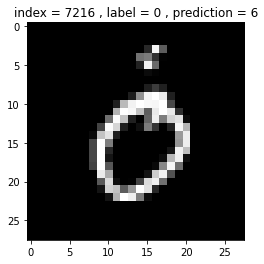

In [13]:
# 임의의 false prediction 이미지 출력

false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = x_test[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()